In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from RLSVRD import RLSVRD as RLSVRD_regressor
from IRWLS_SVR import IRWLS_SVR

# 1D sinc test

In [2]:
def f(x):
    return 30 + np.sin(np.pi*x)/(np.pi*x)
def f_prime(x):
    return  (np.pi*x*np.cos(np.pi*x)-np.sin(np.pi*x))/x**2/np.pi

np.random.seed(0)
x_train = np.random.uniform(size = (12, 1), low = -10.0, high = 10.0)
x_prime_train = np.random.uniform(size = (8, 1), low = -10.0, high = 10.0)
y_train = f(x_train[:,0])
y_prime_train = f_prime(x_prime_train)

In [3]:
C1 = 10.0**2
C2 = 10.0**2
epsilon = 0.001

if len(x_train) > 0:
    regressor = SVR(C = C1, epsilon = epsilon, gamma = 1.0)
    regressor.fit(x_train, y_train)
IRWLS = IRWLS_SVR(C1 = C1, C2 = C2, epsilon = epsilon, gamma = 1.0)
IRWLS.fit(x_train, y_train, x_prime_train, y_prime_train)
RLSVRD = RLSVRD_regressor(C1 = C1, C2 = C2, gamma = 1.0, method = 1)
RLSVRD.fit(x_train, y_train, x_prime_train, y_prime_train, plot_matrices = False)

Inner Loop converged with eta = 0.000696198609131
Inner Loop converged with eta = 0.0147808829414
Inner Loop converged with eta = 0.0278128389444
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 0.531441
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Converged after 12 iterations


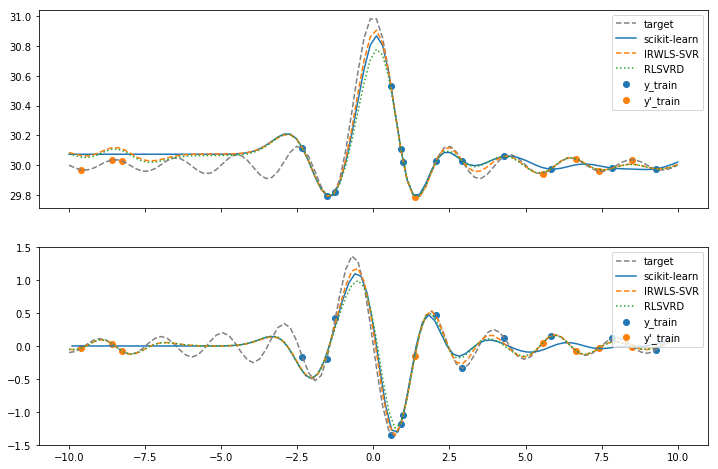

In [4]:
x = np.linspace(-10, 10, 100).reshape((100,1))
delta_x = x[1] - x[0]

fig, (ax0, ax1) = plt.subplots(nrows = 2, figsize = (12, 8), sharex=True)
ax0.scatter(x_train, y_train, label = "y_train")
ax0.scatter(x_prime_train, f(x_prime_train), label = "y'_train")
ax0.plot(x, f(x), "--", color = "0.5", label = "target")
if len(x_train) > 0:
    ax0.plot(x, regressor.predict(x), label = "scikit-learn")
ax0.plot(x, IRWLS.predict(x), "--", label = "IRWLS-SVR")
ax0.plot(x, RLSVRD.predict(x), ":", label = "RLSVRD")
ax0.legend(loc = 1)

ax1.scatter(x_train, f_prime(x_train), label = "y_train")
ax1.scatter(x_prime_train, y_prime_train, label = "y'_train")
ax1.plot(x, f_prime(x), "--", color = "0.5", label = "target")
if len(x_train) > 0:
    ax1.plot(x[1:] - 0.5*delta_x, np.diff(regressor.predict(x))/delta_x, label = "scikit-learn")
ax1.plot(x, IRWLS.predict_derivative(x), "--", label = "IRWLS-SVR")
ax1.plot(x, RLSVRD.predict_derivative(x), ":", label = "RLSVRD")
ax1.legend(loc = 1)

# Testing IRLWS

In [2]:
def f(x):
    return 30 + np.sin(np.pi*x)/(np.pi*x)
def f_prime(x):
    return  (np.pi*x*np.cos(np.pi*x)-np.sin(np.pi*x))/x**2/np.pi

np.random.seed(0)
x_train = np.random.uniform(size = (50, 1), low = -10.0, high = 10.0)
x_prime_train = x_train#np.random.uniform(size = (8, 1), low = -10.0, high = 10.0)
y_train = f(x_train[:,0])
y_prime_train = f_prime(x_prime_train)

Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Maximum iterations (10) reached!
Final Deltas: beta_gammma:  0.001758480465, b:  0.000000057245


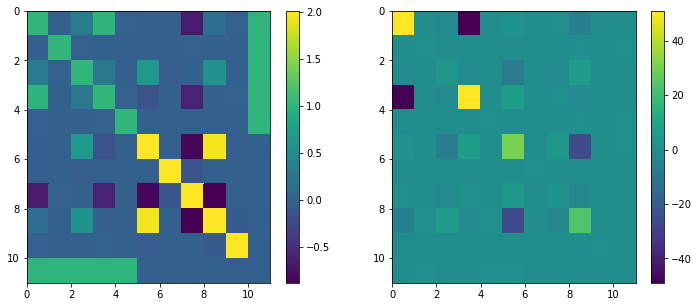

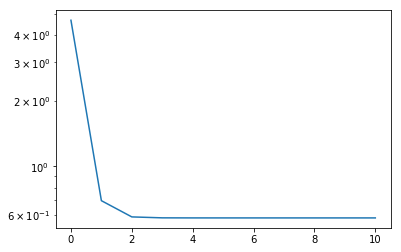

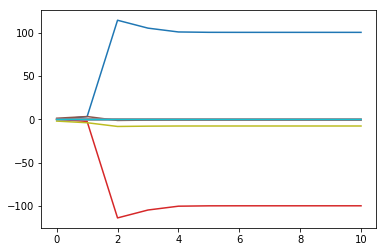

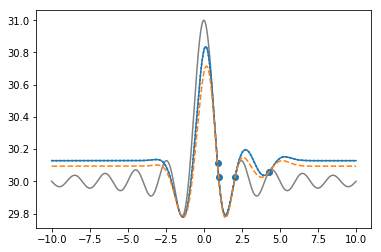

In [8]:
C1 = 10.0**2
C2 = 10.0**2
epsilon = 0.1**10
x_test = np.linspace(-10.0, 10.0, 2000).reshape((-1,1))
y_test = f(x_test).ravel()

i = 5

RLSVRD = RLSVRD_regressor(C1 = C1, C2 = C2, gamma = 1.0, method = 2)
RLSVRD.fit(x_train[:i, :], y_train[:i], x_prime_train[:i,:], y_prime_train[:i,:], plot_matrices = True)
IRWLS = IRWLS_SVR(C1 = C1, C2 = C2, epsilon = epsilon, gamma = 1.0)
IRWLS.fit(x_train[:i, :], y_train[:i], x_prime_train[:i,:], y_prime_train[:i,:], max_iter=10, plot_matrices = False)

plt.figure()
plt.semilogy(IRWLS.Ls)

plt.figure()
plt.plot(IRWLS.coeffs)

plt.figure()
plt.scatter(x_train[:4, :], y_train[:4])
plt.plot(x_test, y_test, "0.5")
plt.plot(x_test, IRWLS.predict(x_test))
plt.plot(x_test, IRWLS.predict(x_test) + epsilon, "C0:")
plt.plot(x_test, IRWLS.predict(x_test) - epsilon, "C0:")
plt.plot(x_test, RLSVRD.predict(x_test), "--")

# Test for increasing density

In [6]:
def f(x):
    return 30 + np.sin(np.pi*x)/(np.pi*x)
def f_prime(x):
    return  (np.pi*x*np.cos(np.pi*x)-np.sin(np.pi*x))/x**2/np.pi

np.random.seed(0)
x_train = np.random.uniform(size = (50, 1), low = -10.0, high = 10.0)
x_prime_train = x_train#np.random.uniform(size = (8, 1), low = -10.0, high = 10.0)
y_train = f(x_train[:,0])
y_prime_train = f_prime(x_prime_train)

Inner Loop converged with eta = 6.07639609665e-06
Inner Loop converged with eta = 5.38547225951e-07
Inner Loop converged with eta = 4.2957996643e-08
Inner Loop converged with eta = 3.08394593453e-09
Inner Loop converged with eta = 2.45995397839e-10
Inner Loop converged with eta = 2.42249109863e-11
Inner Loop converged with eta = 4.42056263648e-13
Converged after 7 iterations


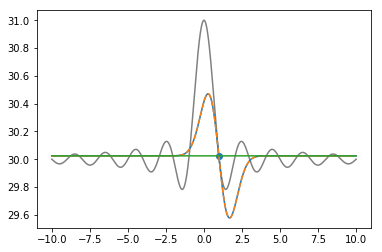

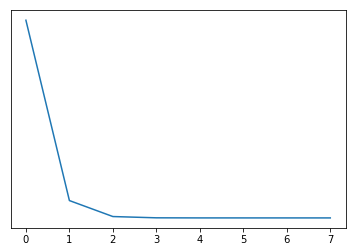

Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Converged after 4 iterations


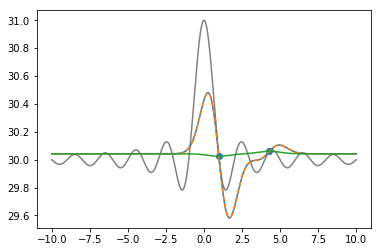

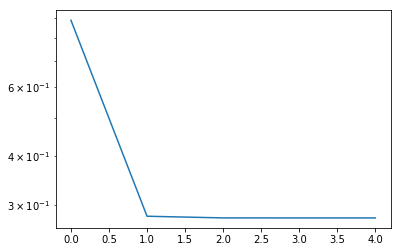

Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Converged after 4 iterations


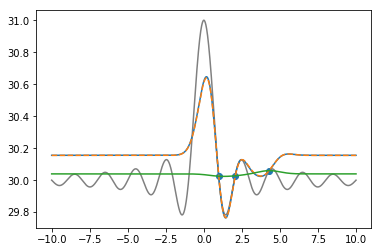

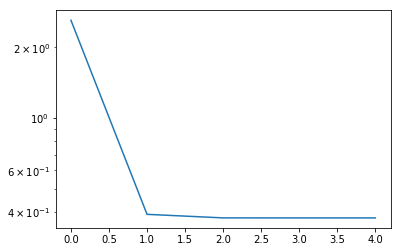

Inner Loop converged with eta = 0.000696198609131
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 0.00706965049015
Inner Loop converged with eta = 2.65613988876e-05
Inner Loop converged with eta = 0.00273892744995
Inner Loop converged with eta = 0.000196627050476
Inner Loop converged with eta = 7.50172357611e-06
Inner Loop converged with eta = 5.30345637568e-08
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 0.000116106307035
Inner Loop converged with eta = 3.58805113111e-06
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Converged after 15 iterations


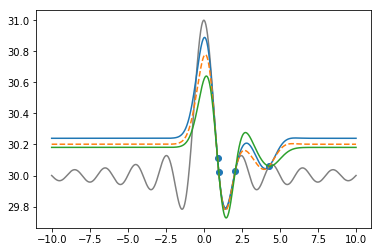

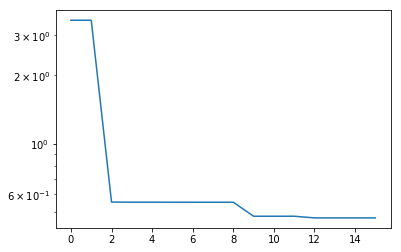

Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 0.00199667811102
Inner Loop converged with eta = 1.41158163862e-05
Inner Loop converged with eta = 7.38747909398e-07
Inner Loop converged with eta = 5.30345637568e-08
Inner Loop converged with eta = 1.32753760223e-09
Inner Loop converged with eta = 3.3230330571e-11
Inner Loop converged with eta = 2.65066527192e-12
Converged after 8 iterations


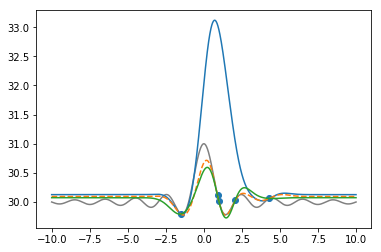

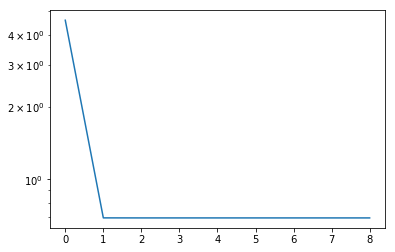

Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 4.92188083828e-06
Inner Loop converged with eta = 2.57585468676e-07
Inner Loop converged with eta = 8.84467056135e-09
Inner Loop converged with eta = 5.71461407801e-10
Inner Loop converged with eta = 1.04280298448e-11
Converged after 6 iterations


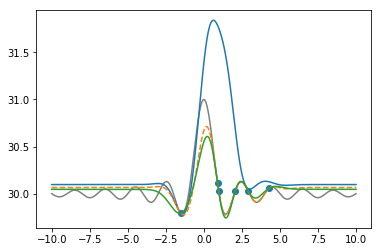

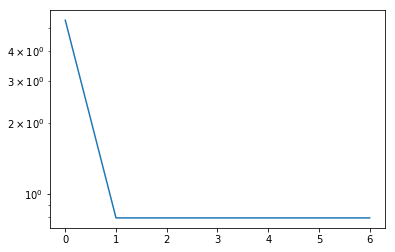

Inner Loop converged with eta = 0.00706965049015
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 0.000332989636532
Inner Loop converged with eta = 0.00636268544114
Inner Loop converged with eta = 0.00872796356809
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 0.00969773729788
Inner Loop converged with eta = 2.15147330989e-05
Inner Loop converged with eta = 5.38547225951e-07
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Converged after 13 iterations


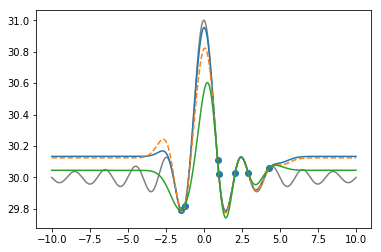

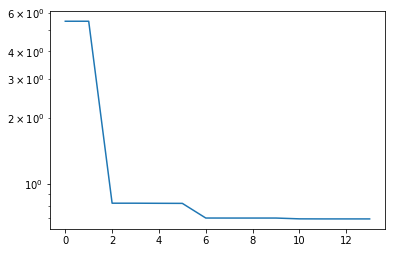

Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 0.000955004950797
Inner Loop converged with eta = 0.00706965049015
Inner Loop converged with eta = 6.85596132413e-05
Inner Loop converged with eta = 0.0107752636643
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.23202331153e-07
Inner Loop converged with eta = 0.000196627050476
Inner Loop converged with eta = 1.14338112728e-05
Inner Loop converged with eta = 4.3622325302e-07
Inner Loop converged with eta = 4.70042056779e-09
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 0.00872796356809
Inner Loop converged with eta = 0.000773554010145
Inner Loop converged with eta = 4.99799580529e-05
Inner Loop converged with eta = 7.38747909398e-07
Inner Loop converged with eta = 5.89272930631e-08
Inner Loop converged with eta = 4.70042056779e-09
Inner Loop converged with eta = 1.04280298448e-11
Converged after 19 iterations


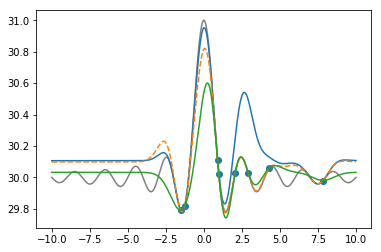

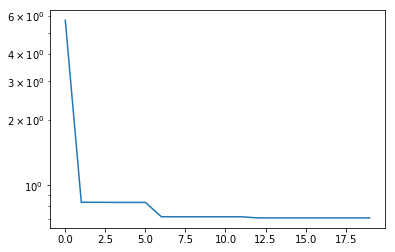

Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 0.000218474500528
Inner Loop converged with eta = 4.84692503356e-07
Inner Loop converged with eta = 2.2829640694e-08
Inner Loop converged with eta = 9.67774912024e-10
Inner Loop converged with eta = 0.00572641689702
Inner Loop converged with eta = 0.000242749445032
Inner Loop converged with eta = 0.0133027946473
Inner Loop converged with eta = 0.00969773729788
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Inner Loop converged with eta = 1.0
Converged after 14 iterations


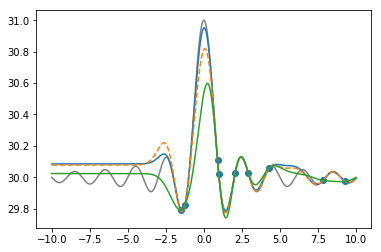

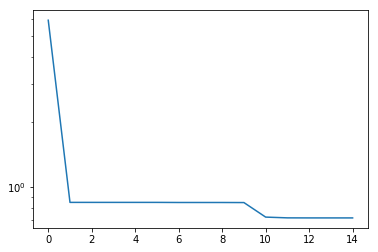

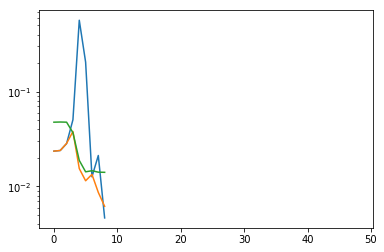

In [7]:
C1 = 10.0**2
C2 = 10.0**2
epsilon = 0.0001

IRWLS = IRWLS_SVR(C1 = C1, C2 = C2, epsilon = epsilon, gamma = 1.0)
RLSVRD = RLSVRD_regressor(C1 = C1, C2 = C2, gamma = 1.0, method = 1)
sk_svr = SVR(C = C1, epsilon = epsilon, gamma = 1.0)
x_test = np.linspace(-10.0, 10.0, 2000).reshape((-1,1))
y_test = f(x_test).ravel()
irwls_error = np.zeros(len(x_train)-1)
rlsvrd_error = np.zeros(len(x_train)-1)
sk_svr_error = np.zeros(len(x_train)-1)

for i in range(1, 10):
    IRWLS.fit(x_train[:i, :], y_train[:i], x_prime_train[:i,:], y_prime_train[:i,:], max_iter=100)
    RLSVRD.fit(x_train[:i, :], y_train[:i], x_prime_train[:i,:], y_prime_train[:i,:])
    sk_svr.fit(x_train[:i, :], y_train[:i])
    irwls_error[i-1] = np.mean((IRWLS.predict(x_test) - y_test)**2)
    rlsvrd_error[i-1] = np.mean((RLSVRD.predict(x_test) - y_test)**2)
    sk_svr_error[i-1] = np.mean((sk_svr.predict(x_test) - y_test)**2)
    if i > 0:
        plt.figure()
        plt.plot(x_test, y_test, "0.5")
        plt.scatter(x_train[:i, 0], y_train[:i])
        plt.plot(x_test, IRWLS.predict(x_test))
        plt.plot(x_test, RLSVRD.predict(x_test), "--")
        plt.plot(x_test, sk_svr.predict(x_test))
        plt.show()
        plt.figure()
        plt.semilogy(IRWLS.Ls)
        plt.show()

plt.figure()
plt.semilogy(irwls_error)
plt.semilogy(rlsvrd_error)
plt.semilogy(sk_svr_error)

# 2D function

In [12]:
def f_2d(x, y):
    return 30 + x*np.sin(y)
def f_2d_dx(x, y):
    return  np.sin(y)
def f_2d_dy(x, y):
    return  x*np.cos(y)

x_2d_train = np.random.uniform(size = (50, 2), low = -3.0, high = 3.0)
y_2d_train = f_2d(x_2d_train[:,0], x_2d_train[:,1])
y_2d_dx_train = f_2d_dx(x_2d_train[:,0], x_2d_train[:,1])
y_2d_dy_train = f_2d_dy(x_2d_train[:,0], x_2d_train[:,1])

In [13]:
C1 = 10.0**2
C2 = 10.0**2
epsilon = 0.01

if len(x_2d_train) > 0:
    regressor = SVR(C = C1, epsilon = epsilon, gamma = 1.0)
    regressor.fit(x_2d_train, y_2d_train)
    irwls = IRWLS_SVR(C = C1, epsilon = epsilon, gamma = 1.0)
    irwls.fit(x_2d_train, y_2d_train)
RLSVRD = RLSVRD_regressor(C1 = C1, C2 = C2, gamma = 1.0, method = 1)
RLSVRD.fit(x_2d_train, y_2d_train, x_2d_train, np.array([y_2d_dx_train, y_2d_dy_train]).T, plot_matrices = False)

Converged after 9 iterations


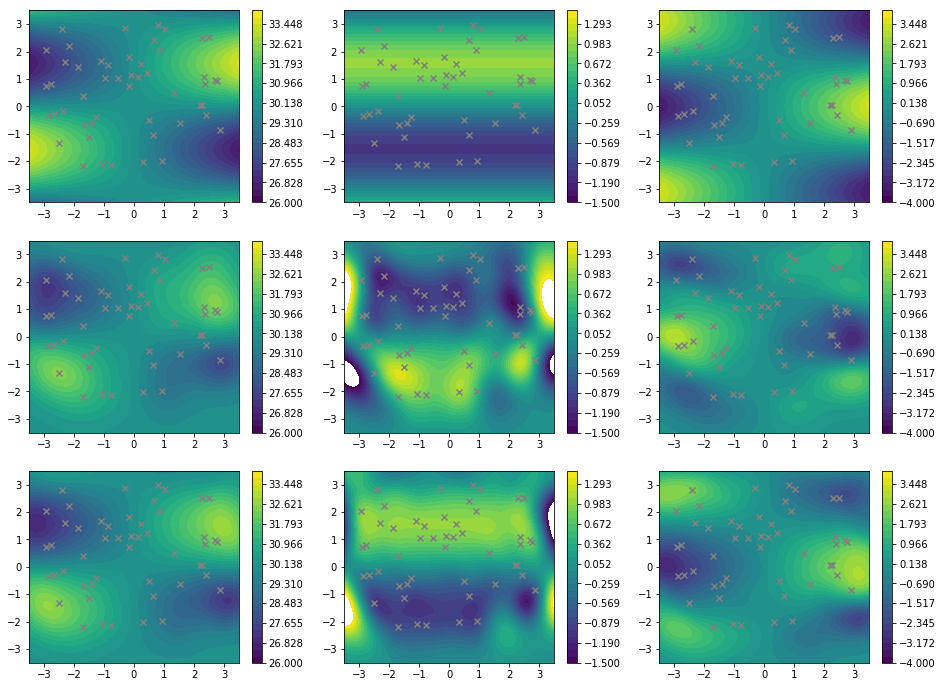

In [27]:
fig, rows = plt.subplots(ncols=3, nrows=3, figsize = (16,12))
x, y = np.linspace(-3.5, 3.5, 100), np.linspace(-3.5, 3.5, 100)
delta_x = 0.01
delta_y = 0.01
xx, yy = np.meshgrid(x, y)
def predict_2d(xs, ys, function):
    return function(np.stack([xx.flatten(), yy.flatten()], axis = 1)).reshape(xs.shape)

predictions = [f_2d(xx, yy), predict_2d(xx, yy, regressor.predict),
              predict_2d(xx, yy, RLSVRD.predict)]
deriv_x_predictions = [f_2d_dx(xx, yy), (regressor.predict(np.stack([xx.flatten() - delta_x, yy.flatten()], axis = 1)).reshape(100, 100) -
                                         regressor.predict(np.stack([xx.flatten() + delta_x, yy.flatten()], axis = 1)).reshape(100, 100))/(2*delta_x),
                       RLSVRD.predict_derivative(np.stack([xx.flatten(), yy.flatten()], axis = 1))[:,0].reshape(100, 100)]
deriv_y_predictions = [f_2d_dy(xx, yy), (regressor.predict(np.stack([xx.flatten(), yy.flatten() - delta_y], axis = 1)).reshape(100, 100) -
                                         regressor.predict(np.stack([xx.flatten(), yy.flatten() + delta_y], axis = 1)).reshape(100, 100))/(2*delta_y),
                      RLSVRD.predict_derivative(np.stack([xx.flatten(), yy.flatten()], axis = 1))[:,1].reshape(100, 100)]

for row, pred, deriv_x, deriv_y in zip(rows, predictions, deriv_x_predictions, deriv_y_predictions):
    p = row[0].contourf(xx, yy, pred, levels = np.linspace(26.0, 34.0, 30))
    fig.colorbar(p, ax = row[0])
    row[0].scatter(x_2d_train[:,0], x_2d_train[:,1], c = "0.5", marker = "x")
    p = row[1].contourf(xx, yy, deriv_x, levels = np.linspace(-1.5, 1.5, 30))
    row[1].scatter(x_2d_train[:,0], x_2d_train[:,1], c = "0.5", marker = "x")
    fig.colorbar(p, ax = row[1])
    p = row[2].contourf(xx, yy, deriv_y, levels = np.linspace(-4, 4, 30))
    fig.colorbar(p, ax = row[2])
    row[2].scatter(x_2d_train[:,0], x_2d_train[:,1], c = "0.5", marker = "x")

# Test for increasing density

In [68]:
def f_2d(x, y):
    return 30 + x*np.sin(y)
def f_2d_dx(x, y):
    return  np.sin(y)
def f_2d_dy(x, y):
    return  x*np.cos(y)

np.random.seed(0)
x_2d_train = np.random.uniform(size = (500, 2), low = -1.0, high = 1.0)
y_2d_train = f_2d(x_2d_train[:,0], x_2d_train[:,1])
y_2d_dx_train = f_2d_dx(x_2d_train[:,0], x_2d_train[:,1])
y_2d_dy_train = f_2d_dy(x_2d_train[:,0], x_2d_train[:,1])

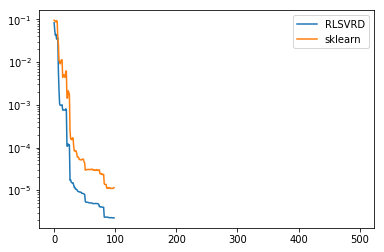

In [70]:
C1 = 10.0**2
C2 = 10.0**2
epsilon = 0.001

#IRWLS = IRWLS_SVR(C1 = C1, C2 = C2, epsilon = epsilon, gamma = 1.0)
RLSVRD = RLSVRD_regressor(C1 = C1, C2 = C2, gamma = 1.0, method = 1)
sk_svr = SVR(C = C1, epsilon = epsilon, gamma = 1.0)
xx, yy = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
x_test = np.stack([xx.flatten(), yy.flatten()], axis = 1)
y_test = f_2d(xx, yy).ravel()
#irwls_error = np.zeros(len(x_2d_train)-1)
rlsvrd_error = np.zeros(len(x_2d_train)-1)
sk_svr_error = np.zeros(len(x_2d_train)-1)

for i in range(1, 100):
    #IRWLS.fit(x_train[:i, :], y_train[:i], x_prime_train[:i,:], y_prime_train[:i,:])
    RLSVRD.fit(x_2d_train[:i, :], y_2d_train[:i], x_2d_train[:i, :], np.array([y_2d_dx_train[:i], y_2d_dy_train[:i]]).T)
    sk_svr.fit(x_2d_train[:i, :], y_2d_train[:i])
    #irwls_error[i-1] = np.mean((IRWLS.predict(x_test) - y_test)**2)
    rlsvrd_error[i-1] = np.mean((RLSVRD.predict(x_test) - y_test)**2)
    sk_svr_error[i-1] = np.mean((sk_svr.predict(x_test) - y_test)**2)
    if i > 1000:
        plt.figure()
        plt.plot(x_test, y_test, "0.5")
        plt.scatter(x_train[:i, 0], y_train[:i])
        plt.plot(x_test, RLSVRD.predict(x_test))
        plt.plot(x_test, sk_svr.predict(x_test))
        plt.show()

plt.figure()
#plt.semilogy(irwls_error)
plt.semilogy(rlsvrd_error, label = "RLSVRD")
plt.semilogy(sk_svr_error, label = "sklearn")
plt.legend()

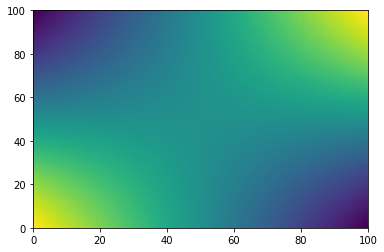

In [51]:
plt.pcolormesh(y_test.reshape((100, 100)))

# Test potential energy surface

In [73]:
coeffs = [[-1,3,1,1,4],
          [-0.5,-2,1,2,2],
          [2.5,1,1,2,2],
          [1.5,-1,2,-3,10],
          [1.5,0,2,5,10]]

def energy(x, y):
    res = sum([c[0]*np.exp(-((x-c[1])**2/c[2]+(y-c[3])**2/c[4])) for c in coeffs])
    return res

def gradient(x, y):
    dx = sum([2*c[0]*(c[1]-x)*
        np.exp(-((x-c[1])**2/c[2]+(y-c[3])**2/c[4]))/c[2] for c in coeffs])
    dy = sum([2*c[0]*(c[3]-y)*
        np.exp(-((x-c[1])**2/c[2]+(y-c[3])**2/c[4]))/c[4] for c in coeffs])
    return dx, dy

In [80]:
np.random.seed(0)
x_2d_train = np.random.uniform(size = (500, 2), low = -.5, high = .5)
y_2d_train = energy(x_2d_train[:,0], x_2d_train[:,1])
y_2d_dx_train, y_2d_dy_train = gradient(x_2d_train[:,0], x_2d_train[:,1])

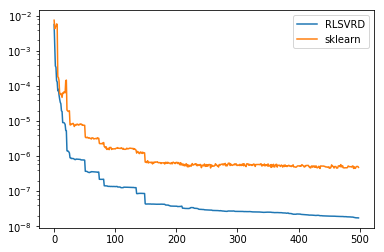

In [84]:
C1 = 10.0**2
C2 = 10.0**2
epsilon = 0.001

#IRWLS = IRWLS_SVR(C1 = C1, C2 = C2, epsilon = epsilon, gamma = 1.0)
RLSVRD = RLSVRD_regressor(C1 = C1, C2 = C2, gamma = 1.0, method = 1)
sk_svr = SVR(C = C1, epsilon = epsilon, gamma = 1.0)

xx, yy = np.meshgrid(np.linspace(-.5, .5, 100), np.linspace(-.5, .5, 100))
x_test = np.stack([xx.flatten(), yy.flatten()], axis = 1)
y_test = energy(xx, yy).ravel()
#irwls_error = np.zeros(len(x_2d_train)-1)
rlsvrd_error = np.zeros(len(x_2d_train)-1)
sk_svr_error = np.zeros(len(x_2d_train)-1)

for i in range(1, 500):
    #IRWLS.fit(x_train[:i, :], y_train[:i], x_prime_train[:i,:], y_prime_train[:i,:])
    RLSVRD.fit(x_2d_train[:i, :], y_2d_train[:i], x_2d_train[:i, :], np.array([y_2d_dx_train[:i], y_2d_dy_train[:i]]).T)
    sk_svr.fit(x_2d_train[:i, :], y_2d_train[:i])
    #irwls_error[i-1] = np.mean((IRWLS.predict(x_test) - y_test)**2)
    rlsvrd_error[i-1] = np.mean((RLSVRD.predict(x_test) - y_test)**2)
    sk_svr_error[i-1] = np.mean((sk_svr.predict(x_test) - y_test)**2)
    if i > 1000:
        plt.figure()
        plt.plot(x_test, y_test, "0.5")
        plt.scatter(x_train[:i, 0], y_train[:i])
        plt.plot(x_test, RLSVRD.predict(x_test))
        plt.plot(x_test, sk_svr.predict(x_test))
        plt.show()

plt.figure()
#plt.semilogy(irwls_error)
plt.semilogy(rlsvrd_error, label = "RLSVRD")
plt.semilogy(sk_svr_error, label = "sklearn")
plt.legend()